## <center><h1>Stock Market Trends Analysis</h1></center>

In [25]:
from datetime import date 
import mplfinance as mpf
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
print("successfully imported all libraries")

successfully imported all libraries


<b>yfinance</b> is a popular open source library developed by Ran Aroussi as a means to access the financial data available on Yahoo Finance. Yahoo Finance offers an excellent range of market data on stocks, bonds, currencies and cryptocurrencies.

In [2]:
df = yf.download("AZN.L", start="1984-01-03", end=str(date.today()))[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)

[*********************100%%**********************]  1 of 1 completed


In [5]:
df.shape

(7779, 6)

In [8]:
print(f'Dataset contains about {df.shape[0]} of rows') 

Dataset contains about 7779 of rows


In [9]:
df.head()

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
1993-05-21,219.96,600.32,600.32,600.32,600.32,0
1993-05-24,218.90,597.44,597.44,597.44,597.44,0
1993-05-25,221.72,605.13,605.13,605.13,605.13,0
1993-05-26,225.06,614.25,614.25,614.25,614.25,0
1993-05-27,225.24,614.73,614.73,614.73,614.73,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7779 entries, 1993-05-21 to 2023-10-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  7779 non-null   float64
 1   Open       7779 non-null   float64
 2   High       7779 non-null   float64
 3   Low        7779 non-null   float64
 4   Close      7779 non-null   float64
 5   Volume     7779 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 425.4 KB


In [11]:
df.describe()

,Adj Close,Open,High,Low,Close,Volume
count,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7.779000e+03
mean,2703.001363,3727.706281,3770.428448,3687.414270,3728.499949,3.493314e+06
std,2707.979484,2472.335441,2499.880191,2447.940088,2473.445672,3.265825e+06
min,212.720000,580.580000,580.580000,580.580000,580.580000,0.000000e+00
25%,1067.385000,2331.210000,2367.000000,2298.040000,2332.105000,1.687834e+06
50%,1483.750000,2911.000000,2933.000000,2884.530000,2909.000000,2.621284e+06
75%,3386.295000,4464.500000,4518.785000,4418.500000,4468.000000,4.478662e+06
max,12215.060000,12164.000000,12828.450000,12122.070000,12294.000000,6.568024e+07


<b>OHLC</b> stands for Open, High, Low, and Close, and it is a common method of recording and displaying price movements in the stock market and other financial markets. These four data points provide valuable information about the trading activity and price dynamics of a particular security, such as a stock, commodity, or currency pair, over a specified period of time, typically on a candlestick or bar chart. Here's what each component of OHLC represents:<br>
<b>Open (O):</b> The opening price is the first price at which a security trades during a given time frame, such as a trading session (e.g., the opening price for the trading day). It is represented as the left-side point of the candlestick or bar.<br>
<b>High (H):</b> The high price represents the highest price at which the security traded during the specified time frame. It is typically the upper point or "wick" of the candlestick or the top of the vertical bar.<br>
<b>Low (L):</b> The low price is the lowest price at which the security traded during the same time frame. It is typically represented as the lower point or "wick" of the candlestick or the bottom of the vertical bar.<br>
<b>Close (C):</b> The closing price is the last price at which the security traded during the designated time frame. It is represented as the right-side point of the candlestick or bar.<br>
<hr>
While the closing price simply refers to the cost of shares at the end of the day, the adjusted closing price takes dividends, stock splits, and new stock offerings into account. The <b>adjusted closing price</b> is a more accurate indicator of stock value since it starts where the closing price finishes.

## Latest Details about the  particular stock  

In [12]:
df.tail(1)

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2023-10-06,10942.0,10956.0,10982.0,10858.0,10942.0,1250802


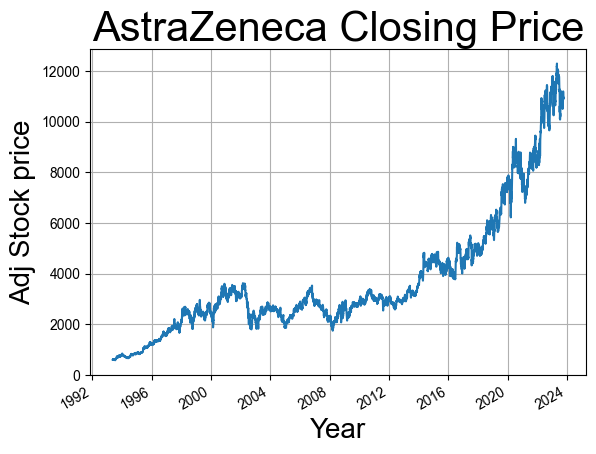

In [19]:
df['Close'].plot(grid = True)
sns.set(rc={'figure.figsize':(15,9)})
plt.title('AstraZeneca Closing Price', color = 'black', fontsize = 30)
plt.xlabel('Year', color = 'black', fontsize = 20)
plt.ylabel('Adj Stock price', color = 'black', fontsize = 20)

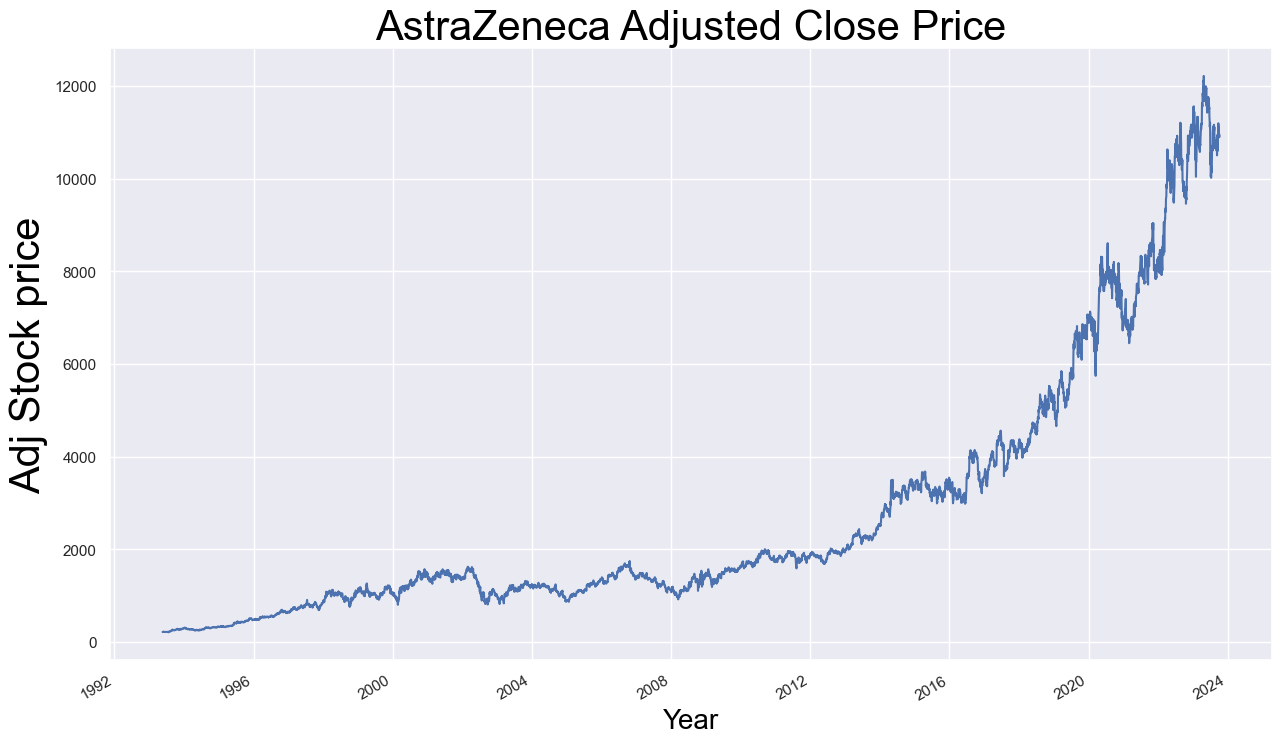

In [20]:
df['Adj Close'].plot(grid = True)
sns.set(rc={'figure.figsize':(15,9)})
plt.title('AstraZeneca Adjusted Close Price', color = 'black', fontsize = 30)
plt.xlabel('Year', color = 'black', fontsize = 20)
plt.ylabel('Adj Stock price', color = 'black', fontsize = 30);

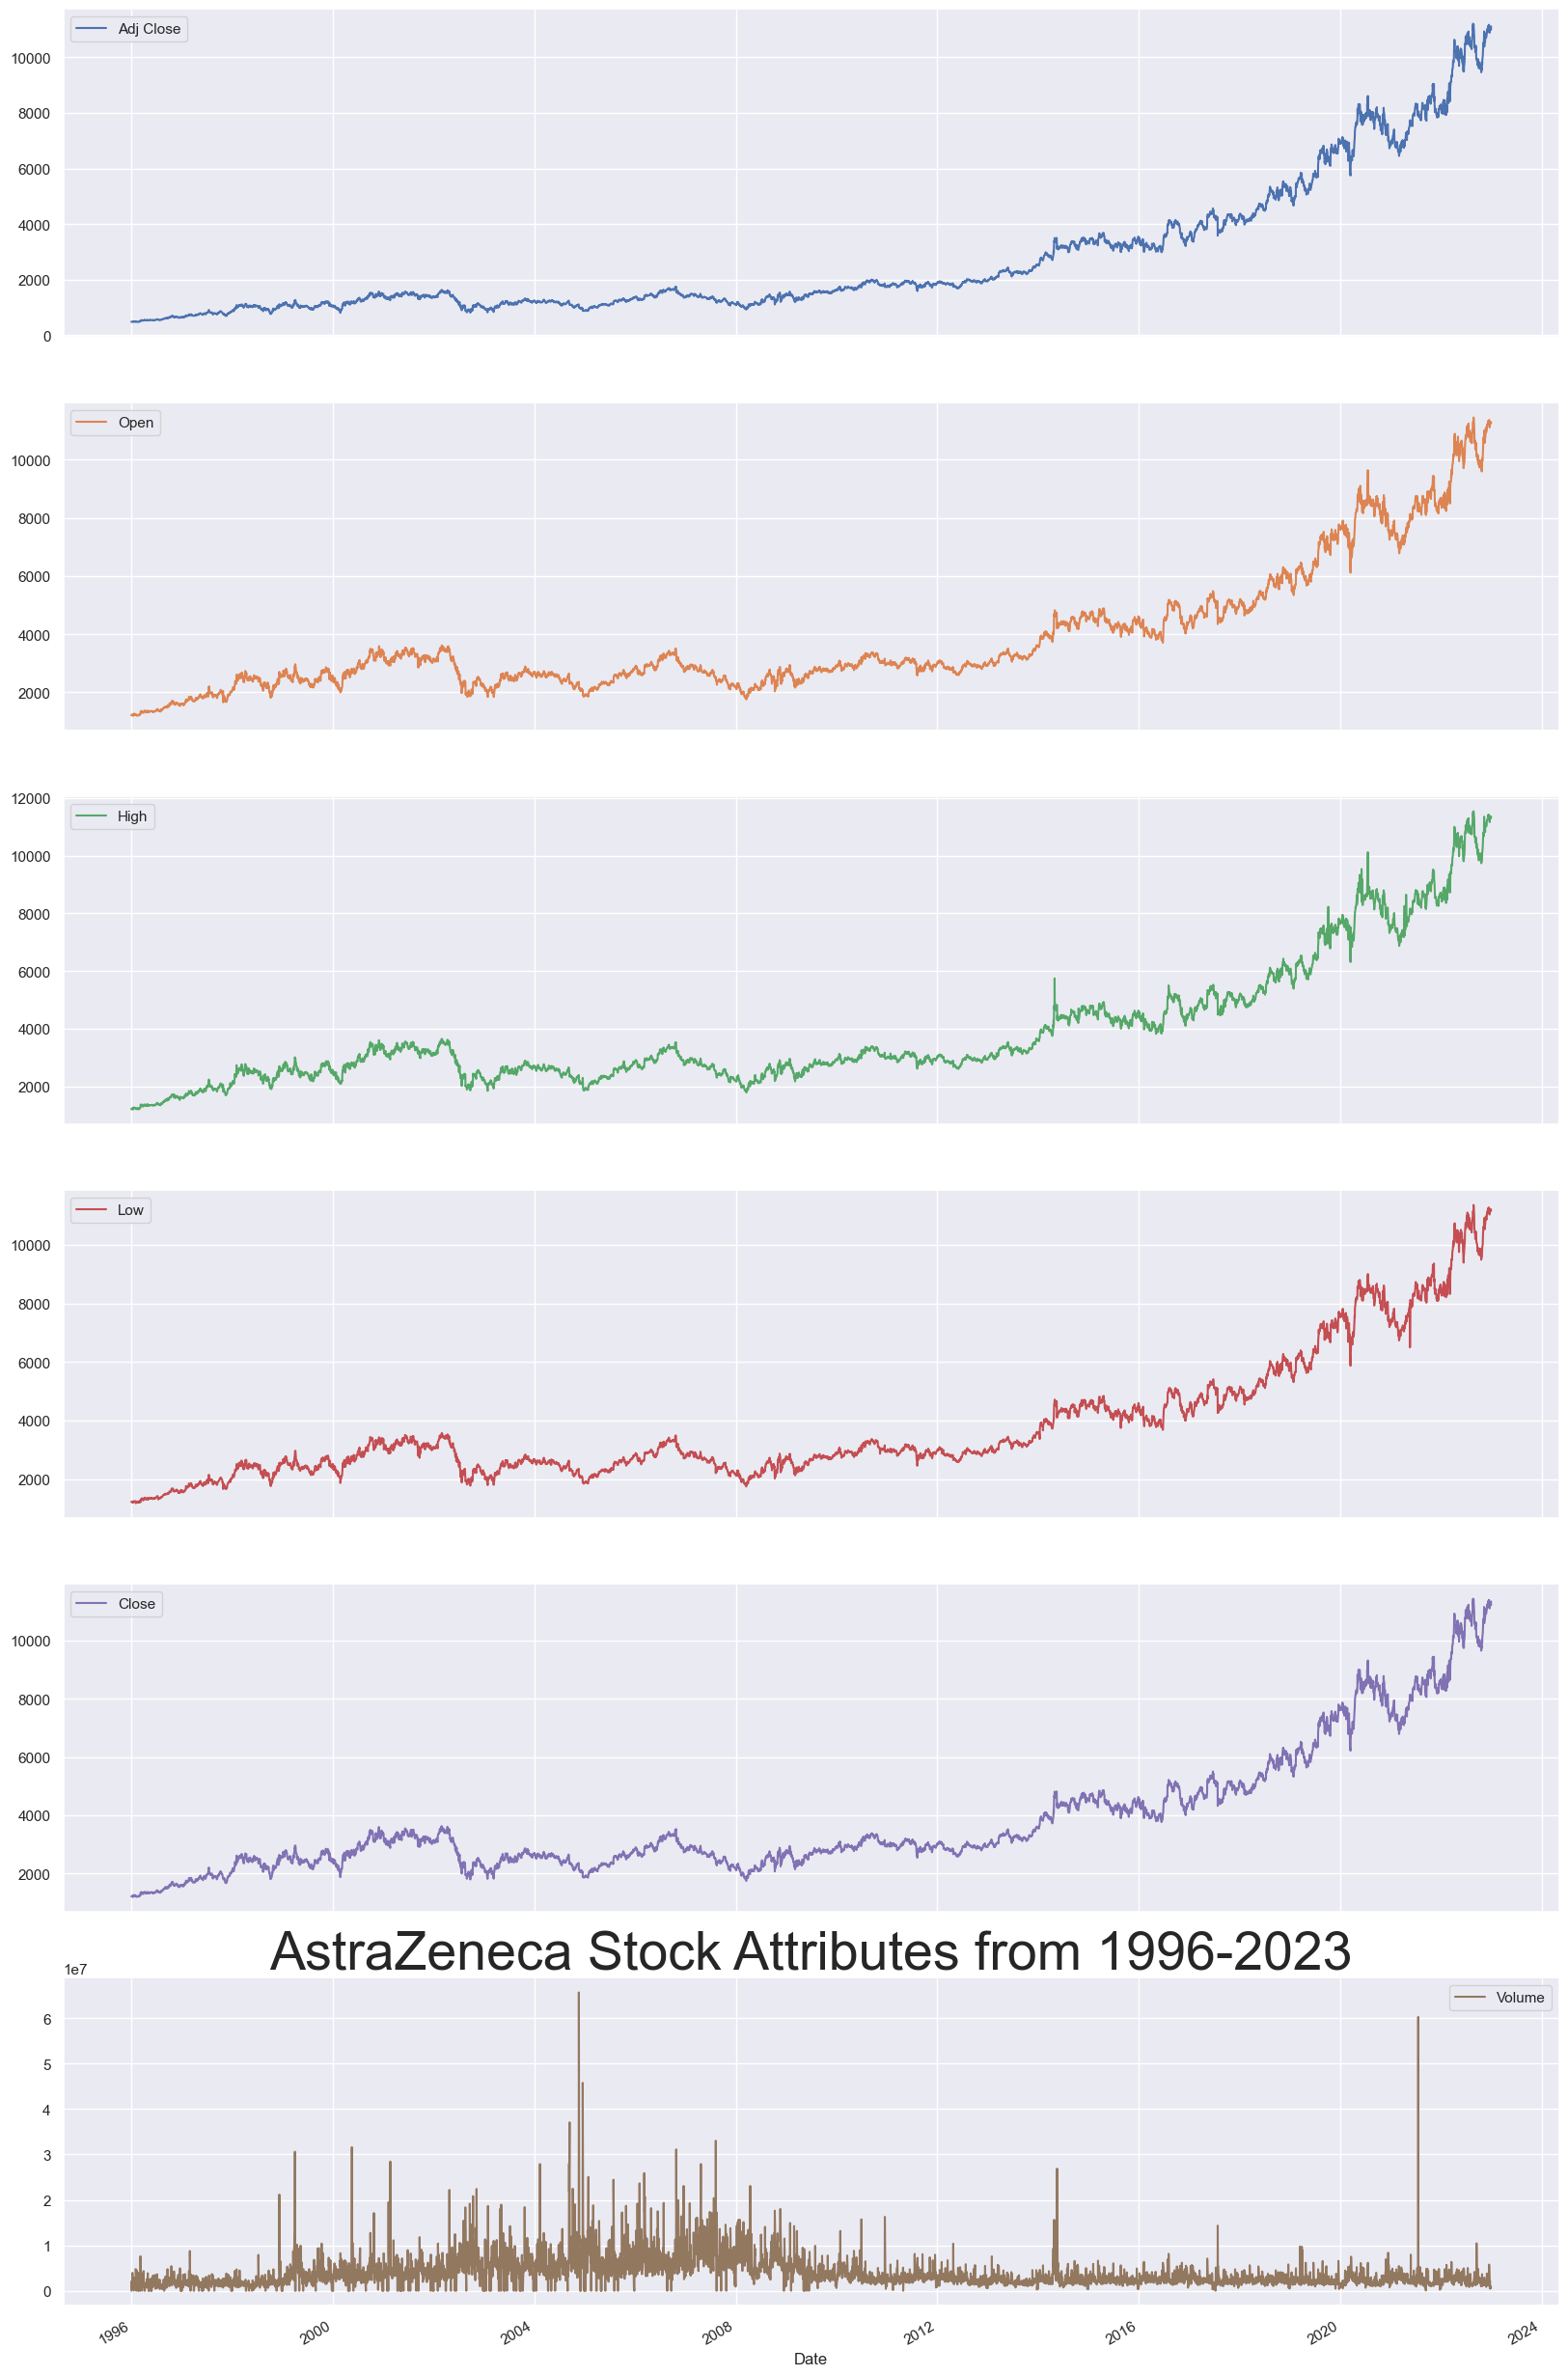

In [21]:
df['1996':'2022'].plot(subplots=True,figsize=(20,35))
plt.title("AstraZeneca Stock Attributes from 1996-2023",fontsize=40)
plt.show()

The <b>Volume</b> in OHLC refers to the total number of shares, contracts, or units of a financial instrument (such as a stock, commodity, or currency pair) that were traded during the specified time period. Volume is typically represented as a bar or histogram on a price chart, showing the level of trading activity.<br>
vity.

Volume is an important indicator in technical analysis because it can provide insights into the strength or weakness of a price trend. Higher trading volume often indicates greater market interest and participation, suggesting that a price move may be more significant. Conversely, lower trading volume may indicate a lack of enthusiasm in the market and could be a sign of potential reversals or consolidation.


## Checking Null Values in the dataset

In [22]:
df.isna().sum()

Adj Close    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64